<a href="https://colab.research.google.com/github/pierreduke/123/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


**Unzip dataset**

In [ ]:
!unzip /content/drive/MyDrive/DatasetFF_train.zip

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: DatasetFF_train/val/real/28580.jpg  
  inflating: DatasetFF_train/val/real/2859.jpg  
  inflating: DatasetFF_train/val/real/28591.jpg  
  inflating: DatasetFF_train/val/real/28592.jpg  
  inflating: DatasetFF_train/val/real/28593.jpg  
  inflating: DatasetFF_train/val/real/28617.jpg  
  inflating: DatasetFF_train/val/real/28618.jpg  
  inflating: DatasetFF_train/val/real/28631.jpg  
  inflating: DatasetFF_train/val/real/28633.jpg  
  inflating: DatasetFF_train/val/real/28635.jpg  
  inflating: DatasetFF_train/val/real/2864.jpg  
  inflating: DatasetFF_train/val/real/28647.jpg  
  inflating: DatasetFF_train/val/real/28649.jpg  
  inflating: DatasetFF_train/val/real/28651.jpg  
  inflating: DatasetFF_train/val/real/28667.jpg  
  inflating: DatasetFF_train/val/real/28671.jpg  
  inflating: DatasetFF_train/val/real/28673.jpg  
  inflating: DatasetFF_train/val/real/2868.jpg  
  inflating: DatasetFF_train/val/real/28680.jp

**Cài đặt thư viện model**

In [ ]:
! pip install git+https://github.com/qubvel/classification_models.git
! pip install git+https://github.com/qubvel/segmentation_models

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-sh7svwo9
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-sh7svwo9
  Running command git submodule update --init --recursive -q
     |████████████████████████████████| 50 kB 4.4 MB/s 
  Created wheel for image-classifiers: filename=image_classifiers-1.0.0-py3-none-any.whl size=20045 sha256=b2093d5f62d28fb3403df731cb85c84df351446c67b829178684e21b903d7b90
  Stored in directory: /tmp/pip-ephem-wheel-cache-lbna4ip5/wheels/0b/96/56/27b17c903efc647c51e4f364bfc20aa67f8d3dccad63c4fb4e
Successfully built image-classifiers
  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-1tcwow9k
  Running command git clone -q https://github.com/qubvel/segmentation_models /tmp/pip-req-build-1tcwow9k
  Running command git submodule update --init --recursive -q
  Created wheel for segmentation-models: filename=segmentation_models-1.0.1-py3-none-any.wh

**1) Khai báo các thư viện sử dụng**

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from classification_models.tfkeras import Classifiers
from tensorflow.keras.models import Sequential
from efficientnet.tfkeras import EfficientNetB1



> **1.1) Model thông thường (ResNet, DenseNet, Xception, ResNext)**



In [ ]:
Xception, preprocess_input = Classifiers.get('xception')
get = Xception(
    weights = 'imagenet',
    input_shape = (224,224, 3),
    include_top = False,
    pooling = 'max'
)

model = Sequential()
model.add(get)
# model.add(GlobalAveragePooling2D()) #resnet, resnext model cần dòng global avgpool
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 2, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 dense_3 (Dense)             (None, 512)               1049088   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                                 
 dense_5 (Dense)             (None, 2)                 258       
                                                                 
Total params: 21,976,490
Trainable params: 21,921,962
Non-trainable params: 54,528
_________________________________________________________________




> **1.2) EfficientNet Model**



In [ ]:
# efficient_net = EfficientNetB1(
#     weights = 'imagenet',
#     input_shape = (224, 224, 3),
#     include_top = False,
#     pooling = 'max'
# )

# model = Sequential()
# model.add(efficient_net)
# model.add(Dense(units = 512, activation = 'relu'))
# model.add(Dropout(0.5))
# model.add(Dense(units = 128, activation = 'relu'))
# model.add(Dense(units = 2, activation = 'softmax'))
# model.summary()

In [ ]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

**2) Khởi tạo đường dẫn, checkpoint và callbacks**

In [ ]:
train_path = '/content/DatasetFF_train/train'
val_path = '/content/DatasetFF_train/val'


In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/checkpoint/'
print('Creating Directory: ' + checkpoint_filepath)
os.makedirs(checkpoint_filepath, exist_ok=True)

Creating Directory: /content/drive/MyDrive/checkpoint/


In [ ]:
custom_callbacks = [
    EarlyStopping(
        monitor = 'val_loss',
        mode = 'min',
        patience = 5,
        verbose = 1
    ),
    ModelCheckpoint(
        filepath = os.path.join(checkpoint_filepath, 'FF_Xception.h5'),
        monitor = 'val_loss',
        mode = 'min',
        verbose = 1,
        save_best_only = True
    )
]

**3) ImageDataGenerator**

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.2,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = 'nearest'
)
train_generator = train_datagen.flow_from_directory(
    directory = train_path,
    target_size = (224,224),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 16,
    shuffle = True
)

val_datagen = ImageDataGenerator(
    rescale = 1/255    #rescale the tensor values to [0,1]
)
val_generator = val_datagen.flow_from_directory(
    directory = val_path,
    target_size = (224,224),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 16,
    shuffle = True
)

Found 69169 images belonging to 2 classes.
Found 17293 images belonging to 2 classes.


In [ ]:
len(train_generator)

4324

**4) Huấn luyện**

In [ ]:
num_epochs = 20

In [ ]:
H = model.fit_generator(
    train_generator,
    epochs = num_epochs,
    steps_per_epoch = len(train_generator),
    validation_data = val_generator,
    validation_steps = len(val_generator),
    callbacks = custom_callbacks
)
print(H.history)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/20
4324/4324 [==============================] - ETA: 0s - loss: 0.6918 - accuracy: 0.5379
Epoch 00001: val_loss improved from inf to 0.68198, saving model to /content/drive/MyDrive/checkpoint/FF_Xception.h5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


4324/4324 [==============================] - 969s 221ms/step - loss: 0.6918 - accuracy: 0.5379 - val_loss: 0.6820 - val_accuracy: 0.5882
Epoch 2/20
4324/4324 [==============================] - ETA: 0s - loss: 0.4626 - accuracy: 0.7786
Epoch 00002: val_loss improved from 0.68198 to 0.48256, saving model to /content/drive/MyDrive/checkpoint/FF_Xception.h5
4324/4324 [==============================] - 956s 221ms/step - loss: 0.4626 - accuracy: 0.7786 - val_loss: 0.4826 - val_accuracy: 0.7692
Epoch 3/20
4324/4324 [==============================] - ETA: 0s - loss: 0.3080 - accuracy: 0.8729
Epoch 00003: val_loss improved from 0.48256 to 0.36124, saving model to /content/drive/MyDrive/checkpoint/FF_Xception.h5
4324/4324 [==============================] - 954s 221ms/step - loss: 0.3080 - accuracy: 0.8729 - val_loss: 0.3612 - val_accuracy: 0.8525
Epoch 4/20
4324/4324 [==============================] - ETA: 0s - loss: 0.2469 - accuracy: 0.9006
Epoch 00004: val_loss did not improve from 0.36124
43

**5) Plot đồ thị train**

In [ ]:
import matplotlib.pyplot as plt
acc = H.history['accuracy']
val_acc = H.history['val_accuracy']
loss = H.history['loss']
val_loss = H.history['val_loss']

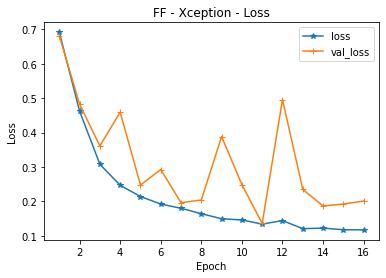

In [ ]:
import matplotlib.pyplot as plt
epochs = range(1, len(acc) + 1)

plt.plot(epochs, H.history['loss'], label='loss', marker="*")
plt.plot(epochs, H.history['val_loss'], label='val_loss', marker="+")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('FF - Xception - Loss')
plt.legend()
plt.show()

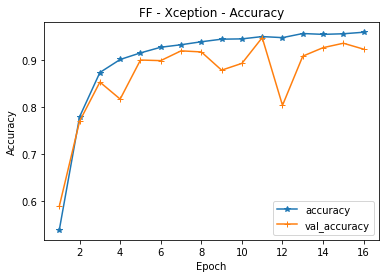

In [ ]:
plt.plot(epochs, H.history['accuracy'], label='accuracy', marker="*")
plt.plot(epochs, H.history['val_accuracy'], label='val_accuracy', marker="+")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('FF - Xception - Accuracy')
plt.legend()
plt.show()



---



---



---



---



---



---
Phần test, làm sau


---

---



---



---



---






In [ ]:
# !unzip /content/drive/MyDrive/CELEB-test.zip

In [ ]:
test_path = '/content/MIX/test'
test_datagen = ImageDataGenerator(
    rescale = 1/255    #rescale the tensor values to [0,1]
)

test_generator = test_datagen.flow_from_directory(
    directory = test_path,
    classes=['fake', 'real'],
    target_size = (input_size, input_size),
    color_mode = "rgb",
    class_mode = None,
    batch_size = 1,
    shuffle = False
)

In [ ]:
test_generator.reset()
preds = model.predict(test_generator, verbose = 1)

In [ ]:
print(preds)

**Encoder True Labels**

In [ ]:
from keras.utils import np_utils
from imutils import paths
import numpy as np
import pickle
from sklearn.preprocessing import LabelEncoder

path_tests = list(paths.list_images('/content/MIX/test'))
labels_test = []

for path_test in path_tests:
	label2 = path_test.split(os.path.sep)[-2]
	labels_test.append(label2)
le = LabelEncoder()
labels_test = le.fit_transform(labels_test)
labels_test = np_utils.to_categorical(labels_test, 2)

f = open('le.pickle', "wb")
f.write(pickle.dumps(le))
f.close()

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report

test = np.argmax(labels_test, axis=-1)
pred = np.argmax(preds, axis=-1)
print(classification_report(test, pred, target_names=le.classes_, digits = 5))

In [ ]:
print(test)
print(pred)

**Confussion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test, pred)
print(cnf_matrix)
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.5f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
  
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

**EER, TPR, FPR**

In [ ]:
from sklearn.metrics import auc, roc_curve
fpr, tpr, _ = roc_curve(test, pred, pos_label=1)

fnr = 1 - tpr
fpr_eer = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
fnr_eer = fnr[np.nanargmin(np.absolute((fnr - fpr)))]
eer = min(fpr_eer, fnr_eer)
print("tpr = ", tpr)
print("fpr = ", fpr)
print("eer = ", eer)

In [ ]:
import matplotlib.pyplot as plt
from itertools import cycle
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()